In [100]:
import mysql.connector as mysql
from config import host, user, password
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

In [9]:
con = mysql.connect(user=user,password=password,host=host,database='team3')

In [10]:
cursor = con.cursor()

## 1. Liczba spotkań każdego miesiąca

In [26]:
query1 = "SELECT * FROM opponents"

In [27]:
cursor.execute(query1)

In [28]:
results = cursor.fetchall()

In [33]:
matches = pd.DataFrame(results,columns=['team_name','date','opponent_name'])

In [37]:
indexes = []
for index, row in matches.iterrows():
    if index == len(matches) -1:
        break
    if row['team_name'] == matches.loc[index+1,'opponent_name']:
        indexes.append(index)

In [41]:
matches.drop(indexes,inplace=True)

In [50]:
matches['month'] = pd.DatetimeIndex(matches['date']).month
matches['year'] = pd.DatetimeIndex(matches['date']).year

In [82]:
group_matches = matches.groupby(by=['year','month']).count()['team_name']

In [186]:
match_freq = pd.DataFrame(list(group_matches.index), columns=['year','month'])
match_freq['day'] = 1
match_freq['date'] = pd.to_datetime(match_freq)
match_freq = match_freq[['date']]
match_freq['freq'] = group_matches.values

In [187]:
date_range = np.array(pd.date_range('2019-06-01','2023-05-30',freq='MS').strftime("%Y-%m-%d %h:%M:%s").tolist())

In [188]:
for date in date_range:
    if pd.Timestamp(str(date)) not in list(match_freq['date']):
        row = {'date':pd.Timestamp(str(date)),'freq':0}
        match_freq = match_freq.append(row,ignore_index=True)

In [189]:
match_freq.sort_values(by=['date'],inplace=True)
match_freq.reset_index(inplace=True)

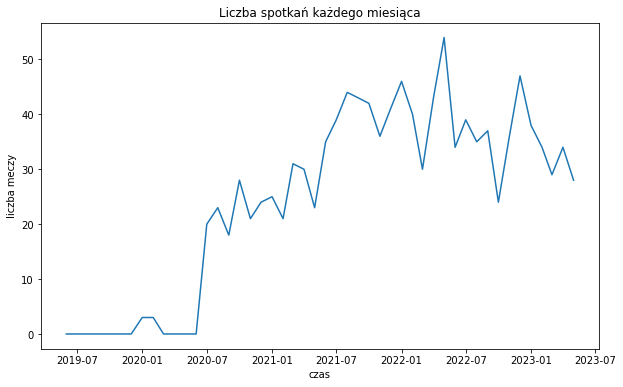

In [190]:
x = match_freq['date']
y = match_freq['freq']

plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.title('Liczba spotkań każdego miesiąca')
plt.xlabel('czas')
plt.ylabel('liczba meczy')
plt.show()

NIE MA MECZY 03.2020 - 06.2020 BO JEST LOCKDOWN xD

## 2. Bilans wygranych i przegranych